In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv('auto-mpg.csv')

In [ ]:
data = df[['horsepower','mpg']].dropna()
print("Column After deleting unnecessary Data from the csv \n", data)

Column After deleting unnecessary Data from the csv 
     horsepower   mpg
0          130  18.0
1          165  15.0
2          150  18.0
3          150  16.0
4          140  17.0
..         ...   ...
393         86  27.0
394         52  44.0
395         84  32.0
396         79  28.0
397         82  31.0

[398 rows x 2 columns]


In [37]:
x = data['horsepower'].to_numpy().reshape(-1, 1)
y = data['mpg']

In [38]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.dropna(subset=['horsepower'])
x = data['horsepower'].astype(float)
y = data['mpg'].astype(float)


In [39]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

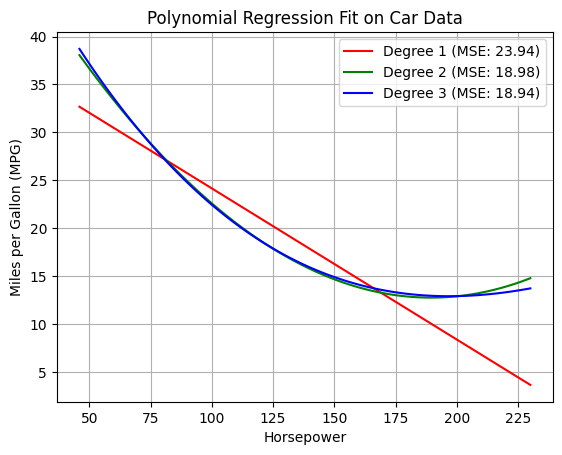

In [46]:
degree = [1,2,3]
colors = ['red','green','blue']

for degree, color in zip(degree,colors):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.to_numpy().reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_poly, y)

    x_range_poly = poly.transform(x_range)
    y_pred = model.predict(x_range_poly)

    y_pred_train = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred_train)

    plt.plot(x_range, y_pred, color=color, label=f'Degree {degree} (MSE: {mse:.2f})')
    
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Polynomial Regression Fit on Car Data')
plt.legend()
plt.grid(True)
plt.show()